In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
import keras
print(keras.__version__)



3.1.1


In [3]:
print(tf.__version__)

2.15.0


In [4]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model



In [5]:
df = pd.read_excel("final_mfcc.xlsx")

In [6]:
df.head()

,Unnamed: 0,File Name,0,1,2,3,4,5,6,7,...,53,54,55,56,57,58,low,good,excellent,category
0,0,29_audio.wav,-2.558627,-2.316059,-2.271928,-2.167459,-1.012644,-0.766544,-0.730626,-1.649334,...,0.501104,0.380764,0.364891,0.427991,0.439193,0.484969,0.709890,0.680682,0.702986,1
1,1,68_audio.wav,-2.980663,-2.736011,-0.521187,-0.848618,-0.707429,0.423838,0.410516,1.267307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,2,92_audio.wav,-2.492121,-2.465798,-2.489711,-2.413806,-1.183820,-1.316758,-0.989441,-1.236956,...,0.363995,0.025381,0.000000,0.000000,0.000000,0.000000,0.744238,0.678753,0.732652,1
3,3,167_audio.wav,-3.142767,-1.895777,-0.817423,-0.956117,0.305237,0.640528,1.312892,1.152519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,214_audio.wav,-2.754371,-2.753473,-2.753528,-0.933587,-0.711726,-0.917892,-1.716798,-1.058946,...,0.322358,-0.043042,0.000668,0.040334,0.112364,0.326456,0.000000,0.000000,0.000000,0


In [7]:
df['category']

0        1
1        0
2        1
3        0
4        0
        ..
10016    1
10017    2
10018    1
10019    3
10020    3
Name: category, Length: 10021, dtype: int64

In [8]:

import matplotlib.pyplot as plt


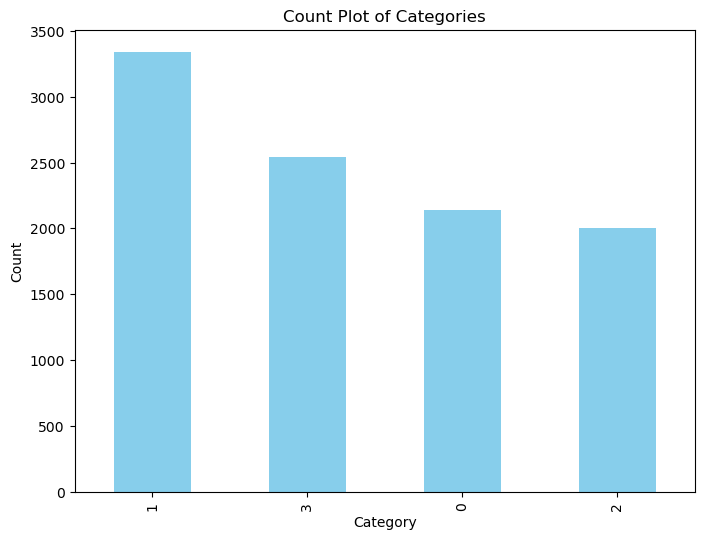

In [9]:

# Count plot
plt.figure(figsize=(8, 6))
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count Plot of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10021 entries, 0 to 10020
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10021 non-null  int64  
 1   File Name   10021 non-null  object 
 2   0           10021 non-null  float64
 3   1           10021 non-null  float64
 4   2           10021 non-null  float64
 5   3           10021 non-null  float64
 6   4           10021 non-null  float64
 7   5           10021 non-null  float64
 8   6           10021 non-null  float64
 9   7           10021 non-null  float64
 10  8           10021 non-null  float64
 11  9           10021 non-null  float64
 12  10          10021 non-null  float64
 13  11          10021 non-null  float64
 14  12          10021 non-null  float64
 15  13          10021 non-null  float64
 16  14          10021 non-null  float64
 17  15          10021 non-null  float64
 18  16          10021 non-null  float64
 19  17          10021 non-nul

In [11]:
df.drop(['Unnamed: 0'], axis= 1 ,inplace = True)

In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,low,good,excellent,category
count,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,...,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000
mean,-2.933617,-2.379532,-1.993281,-1.528550,-1.235209,-1.292886,-1.307355,-1.175128,-0.962221,-0.698962,...,0.158317,0.160967,0.134690,0.125582,0.127189,0.127814,0.249496,0.376383,0.479972,1.492965
std,0.364519,0.453601,0.716084,0.718234,0.548814,0.566529,0.695869,0.913354,1.102119,1.220488,...,0.246662,0.247493,0.240409,0.224015,0.229172,0.226296,0.345568,0.327006,0.308181,1.088167
min,-4.741494,-3.775729,-3.598466,-3.281133,-3.208399,-3.420942,-3.414142,-3.375000,-3.500309,-3.645389,...,-2.271451,-2.449173,-2.085569,-2.351177,-2.396610,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.109447,-2.678609,-2.536146,-2.196407,-1.553076,-1.641057,-1.749152,-1.793964,-1.778772,-1.721834,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-2.893776,-2.422233,-2.224999,-1.409739,-1.203846,-1.300155,-1.360217,-1.346879,-1.248828,-1.004619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.617871,0.652550,1.000000
75%,-2.704725,-2.157335,-1.428597,-0.965483,-0.867136,-0.935168,-0.953588,-0.797128,0.304377,0.440149,...,0.317032,0.321789,0.270220,0.256979,0.254301,0.261261,0.713883,0.666188,0.695177,3.000000
max,-1.345597,0.061582,0.395263,0.437753,0.639872,1.514344,1.558657,1.558757,1.892567,1.910836,...,1.430815,1.720376,1.632915,1.691118,1.635881,1.356163,0.784786,0.747311,0.762822,3.000000


In [13]:
df.drop(['low','good','excellent'],axis = 1 ,inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10021 entries, 0 to 10020
Data columns (total 61 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   File Name  10021 non-null  object 
 1   0          10021 non-null  float64
 2   1          10021 non-null  float64
 3   2          10021 non-null  float64
 4   3          10021 non-null  float64
 5   4          10021 non-null  float64
 6   5          10021 non-null  float64
 7   6          10021 non-null  float64
 8   7          10021 non-null  float64
 9   8          10021 non-null  float64
 10  9          10021 non-null  float64
 11  10         10021 non-null  float64
 12  11         10021 non-null  float64
 13  12         10021 non-null  float64
 14  13         10021 non-null  float64
 15  14         10021 non-null  float64
 16  15         10021 non-null  float64
 17  16         10021 non-null  float64
 18  17         10021 non-null  float64
 19  18         10021 non-null  float64
 20  19    

In [15]:
df.drop(['File Name'],axis =1, inplace = True)

In [16]:
sample_df = df

In [17]:
X = sample_df.drop(['category'],axis = 1) 

In [18]:
Y = df['category']

In [19]:
X.shape

(10021, 59)

In [20]:
Y.shape

(10021,)

In [21]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20,random_state=20)

In [53]:
print(X_train.shape, X_test.shape)

(8016, 59) (2005, 59)


In [54]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [55]:
print(x_traincnn.shape, x_testcnn.shape)

(8016, 59, 1) (2005, 59, 1)


In [56]:


# Define the input shape
input_shape = (59,1 )

# Define the number of classes
num_classes = 4

# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\Vaibhavi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 59, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 59, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 59, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 59, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,572 (506.14 KB)

 Trainable params: 129,572 (506.14 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history = model.fit(x_traincnn, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 44s 143ms/step - accuracy: 0.5864 - loss: 0.9496 - val_accuracy: 0.7701 - val_loss: 0.5586
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 48s 171ms/step - accuracy: 0.7897 - loss: 0.5161 - val_accuracy: 0.7471 - val_loss: 0.5685
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.8180 - loss: 0.4437 - val_accuracy: 0.8125 - val_loss: 0.4654
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 146ms/step - accuracy: 0.8521 - loss: 0.3691 - val_accuracy: 0.8833 - val_loss: 0.3089
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 152ms/step - accuracy: 0.8748 - loss: 0.3060 - val_accuracy: 0.8594 - val_loss: 0.3487
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 171ms/step - accuracy: 0.8886 - loss: 0.2884 - val_accuracy: 0.8259 - val_loss: 0.4545
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - accuracy: 0.8785 - loss: 0.2912 - val_accuracy: 0.8504 - val_loss: 0.3671
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 153ms/step - accuracy: 0.8890 - loss: 0

In [58]:
model.evaluate(X_test, Y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8577 - loss: 0.3154


[0.3140966594219208, 0.8608478903770447]

In [59]:
predictions = np.argmax(model.predict(x_testcnn),axis = -1)
             
predictions

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step


array([0, 0, 0, ..., 3, 1, 1], dtype=int64)

In [60]:
print(Y_test)

403     0
2817    0
8297    0
8847    3
5445    0
       ..
880     0
1556    2
701     3
5549    1
118     1
Name: category, Length: 2005, dtype: int64


In [61]:
new_Ytest = Y_test.astype(int)

new_Ytest


403     0
2817    0
8297    0
8847    3
5445    0
       ..
880     0
1556    2
701     3
5549    1
118     1
Name: category, Length: 2005, dtype: int32

In [62]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       429
           1       0.94      0.82      0.88       677
           2       0.82      0.92      0.86       390
           3       0.75      0.91      0.82       509

    accuracy                           0.86      2005
   macro avg       0.87      0.87      0.86      2005
weighted avg       0.88      0.86      0.86      2005



In [38]:
import keras

In [39]:
from keras.models import load_model

# Assuming `model` is your Keras model object
model.save('lstm_model.keras')

In [40]:
# Load the saved model
loaded_model = load_model('lstm_model.keras')


In [41]:
audio = "29_audio.wav"

In [42]:
print(predictions[:100])

[0 0 0 3 0 2 1 3 0 1 0 3 2 1 3 1 3 3 2 3 0 1 3 3 1 2 1 1 3 3 0 1 0 1 0 1 0
 0 3 0 1 0 1 0 1 1 0 1 2 3 3 2 3 3 3 3 2 1 3 3 2 1 2 3 1 3 0 1 3 2 3 1 3 2
 2 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 3 0 0 1 0 1]


In [63]:
import matplotlib.pyplot as plt



# Access training history
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1, 11)


'''# Plot training and validation accuracy
#plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()'''

# Print final accuracy
print("Final training accuracy:", train_acc[-1])
print("Final validation accuracy:", val_acc[-1])

print(len(train_acc),"\n")
print(len(train_loss),"\n")
print(len(val_acc),"\n")
print(len(val_loss),"\n")

Final training accuracy: 0.8922155499458313
Final validation accuracy: 0.8608478903770447
10 

10 

10 

10 



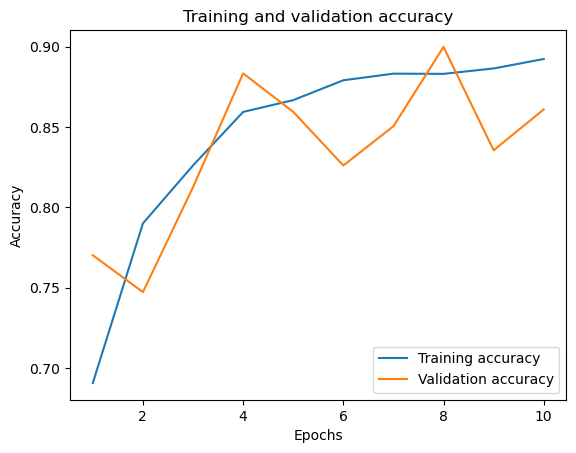

In [64]:

# Plot training and validation accuracy
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

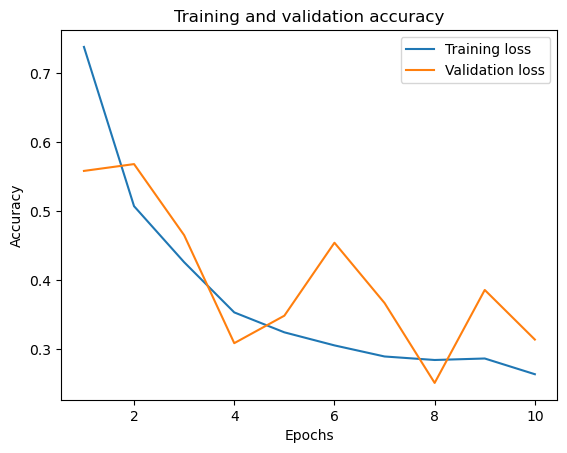

In [65]:
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20,random_state=20)

In [82]:
y_train_encoded = tf.keras.utils.to_categorical(Y_train, num_classes=4)


In [83]:
y_val_encoded = tf.keras.utils.to_categorical(Y_test, num_classes=4)

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your model
model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(59,)),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Assuming you have 4 output classes
])

# Compile the model
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_mlp = model_mlp.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_val_encoded))


Epoch 1/10


C:\Users\Vaibhavi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6995 - loss: 0.7239 - val_accuracy: 0.8539 - val_loss: 0.3692
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8684 - loss: 0.3249 - val_accuracy: 0.8703 - val_loss: 0.3076
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8808 - loss: 0.2807 - val_accuracy: 0.8898 - val_loss: 0.2603
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8917 - loss: 0.2484 - val_accuracy: 0.9002 - val_loss: 0.2490
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9047 - loss: 0.2267 - val_accuracy: 0.9037 - val_loss: 0.2391
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9073 - loss: 0.2135 - val_accuracy: 0.8993 - val_loss: 0.2316
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9191 - loss: 0.1856 - val_accuracy: 0.9127 - val_loss: 0.2157
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9252 - loss: 0.1695 - val_accuracy: 0.9162 - val_

In [91]:

# Access training history
train_acc = history_mlp.history['accuracy']
train_loss = history_mlp.history['loss']
val_acc = history_mlp.history['val_accuracy']
val_loss = history_mlp.history['val_loss']
epochs = range(1, 11)


'''# Plot training and validation accuracy
#plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()'''

# Print final accuracy
print("Final training accuracy:", train_acc[-1])
print("Final validation accuracy:", val_acc[-1])

print(len(train_acc),"\n")
print(len(train_loss),"\n")
print(len(val_acc),"\n")
print(len(val_loss),"\n")

Final training accuracy: 0.9393712282180786
Final validation accuracy: 0.9206982254981995
10 

10 

10 

10 



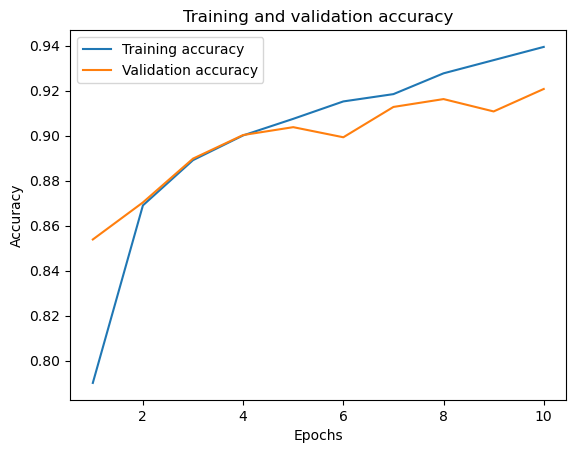

In [92]:
# Plot training and validation accuracy
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

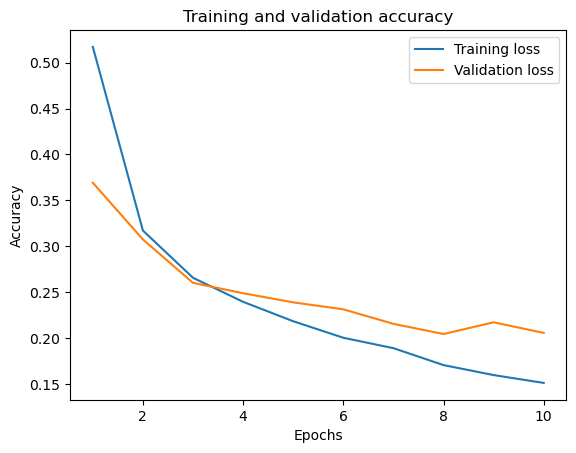

In [93]:
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [95]:
from keras.models import load_model

# Assuming `model` is your Keras model object
model_mlp.save('mlp_model.keras')

In [96]:
# Load the saved model
mlp_load_model = load_model('mlp_model.keras')


In [97]:
predictions = np.argmax(model_mlp.predict(X_test),axis = -1)
             
predictions

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([0, 3, 0, ..., 3, 1, 1], dtype=int64)

In [99]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       429
           1       0.89      0.94      0.92       677
           2       0.94      0.93      0.94       390
           3       0.91      0.86      0.88       509

    accuracy                           0.92      2005
   macro avg       0.93      0.92      0.92      2005
weighted avg       0.92      0.92      0.92      2005

